In [200]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [201]:
# Chargement des données
data = pd.read_csv('data/winequality.csv')

# Séparation des données en entrée (X) et sortie (y)
X = data.drop('quality', axis=1)
y = data['quality']

# Séparation en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# fussioner X_train et y_train
train = pd.concat([X_train, y_train], axis=1)

In [202]:
train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
493,8.7,0.690,0.31,3.0,0.086,23.0,81.0,1.00020,3.48,0.74,11.6,6
354,6.1,0.210,0.40,1.4,0.066,40.5,165.0,0.99120,3.25,0.59,11.9,6
342,10.9,0.390,0.47,1.8,0.118,6.0,14.0,0.99820,3.30,0.75,9.8,6
834,8.8,0.685,0.26,1.6,0.088,16.0,23.0,0.99694,3.32,0.47,9.4,5
705,8.4,1.035,0.15,6.0,0.073,11.0,54.0,0.99900,3.37,0.49,9.9,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1130,9.1,0.600,0.00,1.9,0.058,5.0,10.0,0.99770,3.18,0.63,10.4,6
1294,8.2,0.635,0.10,2.1,0.073,25.0,60.0,0.99638,3.29,0.75,10.9,6
860,7.2,0.620,0.06,2.7,0.077,15.0,85.0,0.99746,3.51,0.54,9.5,5
1459,7.9,0.200,0.35,1.7,0.054,7.0,15.0,0.99458,3.32,0.80,11.9,7


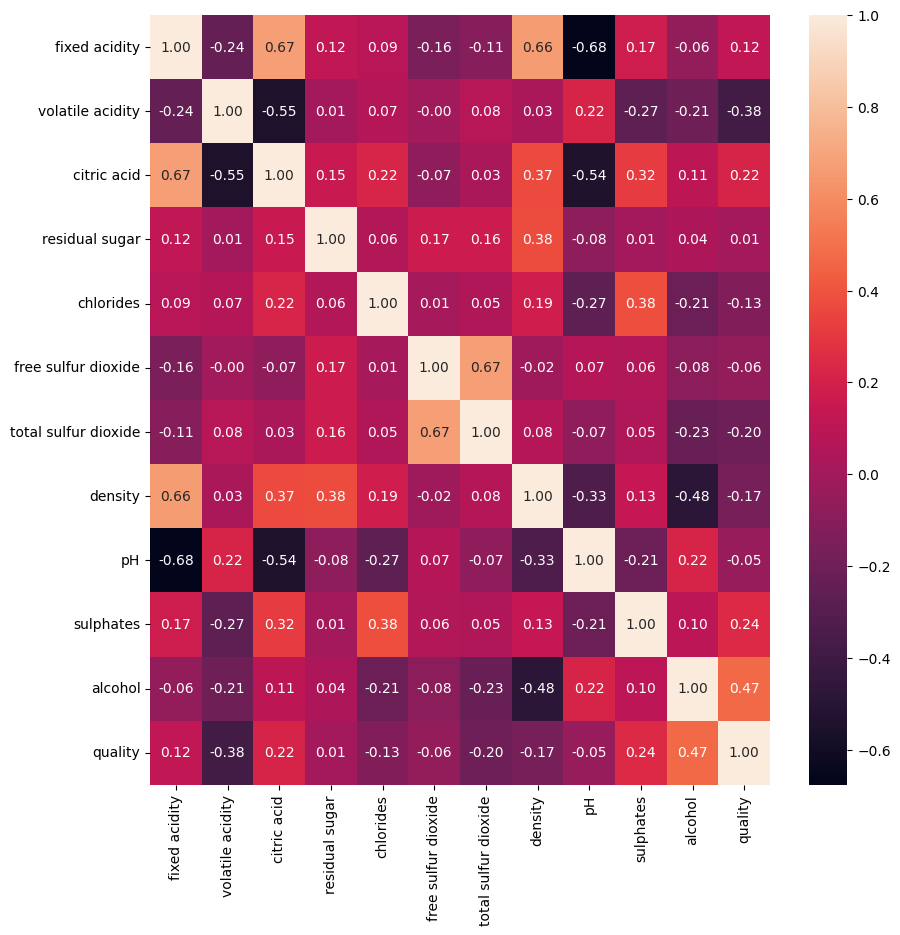

In [203]:
train.corr()
# heat map
plt.figure(figsize=(10, 10))
sns.heatmap(train.corr(), annot=True, fmt='.2f')
plt.show()

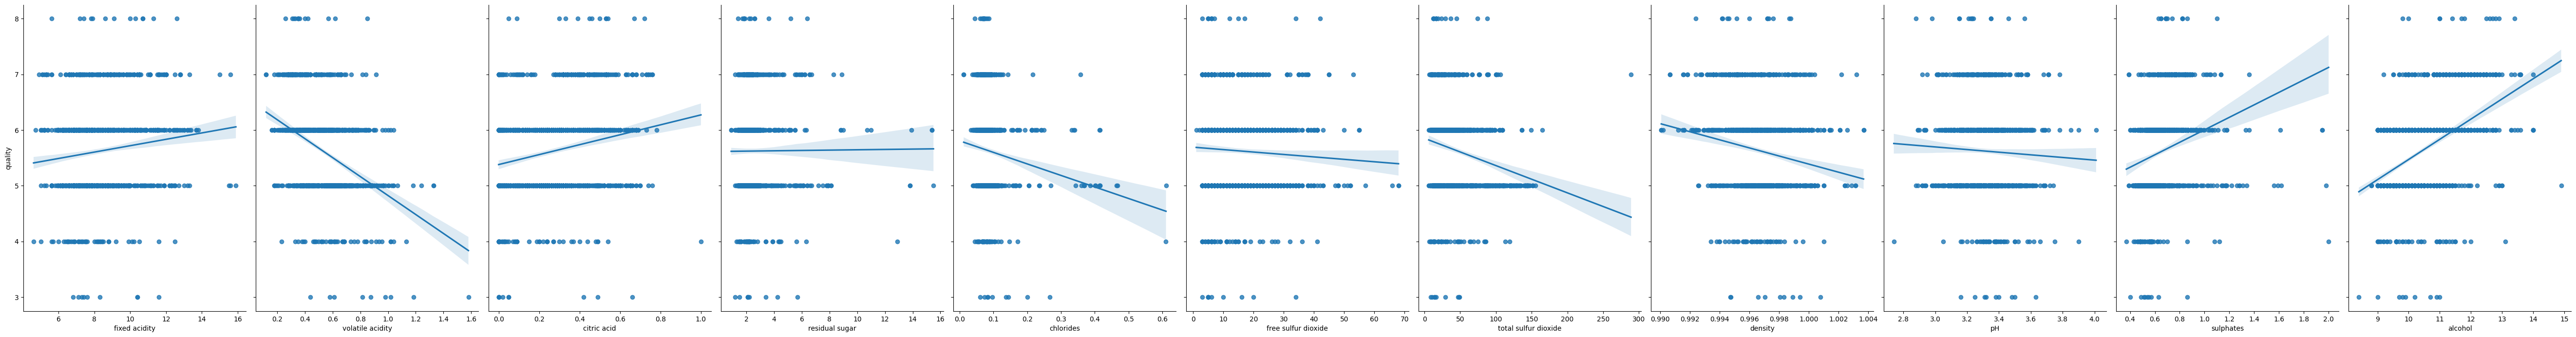

In [204]:
sns.pairplot(train, x_vars=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol'], y_vars='quality', height=7, aspect=0.7, kind='reg')

In [205]:
print(data['quality'].value_counts())
data['quality'] = data['quality'].map(lambda q: "bon" if q >= 5 else "mauvais")
X = data.drop('quality', axis=1)
y = data['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64


In [206]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler , MinMaxScaler
import numpy as np

# Définition des colonnes numériques et catégorielles
numeric_cols = X.select_dtypes(include=np.number).columns

# Création des transformeurs pour les colonnes
numeric_transformer = Pipeline(steps=[
    ('std_scaler', StandardScaler()),
])

In [207]:
# Création du transformateur de colonnes pour les colonnes numériques et catégorielles
from sklearn.compose import ColumnTransformer


preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_cols),
    ]
)

In [208]:
from sklearn.ensemble import RandomForestClassifier

# Définition de la grille de recherche pour les hyperparamètres
param_grid = {
    "classifier__n_estimators": [200],
}

In [209]:
# Recherche de grille pour les meilleurs hyperparamètres pour chaque modèle
from sklearn.model_selection import GridSearchCV

pipeline = Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("classifier", RandomForestClassifier())
    ])


grid_search = GridSearchCV(pipeline, param_grid, cv=5)
model = grid_search.fit(X_train , y_train)
print(f"Meilleur Score : {grid_search.best_score_} et les meilleurs paramètres: {grid_search.best_params_}")

Meilleur Score : 0.9601256127450981 et les meilleurs paramètres: {'classifier__n_estimators': 200}


In [210]:
# Affichage de la performance du modèle sur les données de test
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
y_pred = model.predict(X_test)
print(f"Accuracy : {accuracy_score(y_test, y_pred)}")
print(f"Precision : {precision_score(y_test, y_pred, average='macro')}")
print(f"Recall : {recall_score(y_test, y_pred, average='macro')}")
print(f"F1 : {f1_score(y_test, y_pred, average='macro')}")

Accuracy : 0.96875
Precision : 0.9843260188087775
Recall : 0.5454545454545454
F1 : 0.5753715498938429


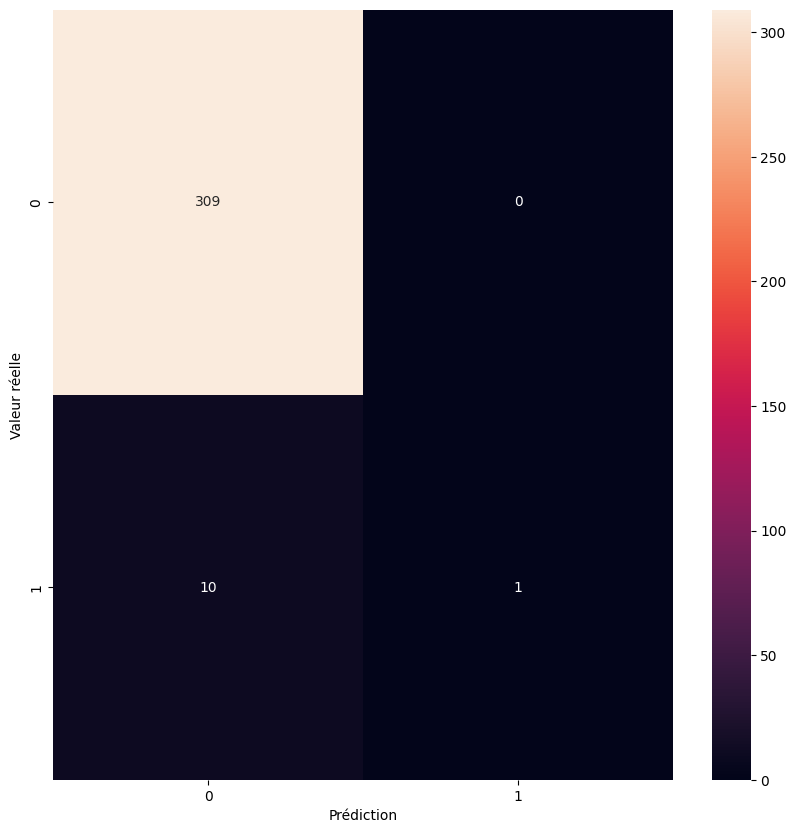

In [211]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prédiction')
plt.ylabel('Valeur réelle')
plt.show()